<a href="https://colab.research.google.com/github/khalishekahmad/teachingMLDL/blob/deep-learning/Deep_Learning_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Pengerjaan Deep Learning menggunakan PyTorch and TensorFlow (Week 1)

# Persiapan: Pemuatan dan Preprocessing Data

## 1. Menginstal atau Memastikan Instalasi PyTorch, Tensorflow dan Modul Pendukung Seperti NumPy dan Pandas

In [163]:
%pip install pandas numpy matplotlib scikit-learn torch tensorflow

Note: you may need to restart the kernel to use updated packages.


## 2. Mengimpor Library yang Dibutuhkan

In [164]:
import pandas as pd # untuk membaca data dari file csv
import numpy as np # untuk operasi matematika
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import LabelEncoder, StandardScaler # untuk mengubah label kelas menjadi angka dan standarisasi data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix # untuk menghitung metrik evaluasi
import matplotlib.pyplot as plt # untuk membuat plot

## 3. Memuat Dataset ke Dalam Program

In [165]:
data = pd.read_csv('./income.csv').dropna() # membaca data dari file csv
data.sample(20) # menampilkan 10 baris data secara acak

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25316,40,Private,321856,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,>50K
48575,28,Self-emp-not-inc,141702,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,60,United-States,<=50K.
6576,39,Private,211440,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
31453,33,Private,207201,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,55,United-States,>50K
44345,25,Private,267594,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K.
9194,39,State-gov,99156,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
18764,52,Self-emp-inc,561489,Masters,14,Divorced,Exec-managerial,Not-in-family,Black,Female,0,0,50,United-States,<=50K
22497,28,Private,272913,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,30,Mexico,<=50K
6269,24,Private,86745,Bachelors,13,Married-civ-spouse,Prof-specialty,Other-relative,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
4983,34,Private,117963,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


In [166]:
data.describe() # menampilkan statistik data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,1.897271e+05,10.090821,1091.137649,87.853489,40.600050
std,13.558961,1.055695e+05,2.568320,7487.228336,404.010612,12.260345
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175840e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## 4. Mengonversi dan Menormalisasi Data

In [167]:
# Menghapus spasi tambahan dari kolom kategori jika ada
data = data.apply(lambda x: x.str.strip(' .') if x.dtype == "object" else x)

# Mengubah target menjadi biner (0 = <=50K, 1 = >50K)
data['income'] = LabelEncoder().fit_transform(data['income'])

# Memisahkan fitur numerik dan kategorikal
num_cols = data.drop(columns=['income']).select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Mengonversi variabel kategori menggunakan One-Hot Encoding
data = pd.get_dummies(data, columns=cat_cols, drop_first=True, dtype=int)

# Normalisasi fitur numerik
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['income']).values
y = data['income'].values

print(X.shape, y.shape)
print(X, "\n", y) # menampilkan data fitur dan label

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(47621, 100) (47621,)
[[ 0.02650056 -1.06292396  1.13272862 ...  1.          0.
   0.        ]
 [ 0.83778069 -1.00803062  1.13272862 ...  1.          0.
   0.        ]
 [-0.04725218  0.24551736 -0.42472622 ...  1.          0.
   0.        ]
 ...
 [-0.04725218  1.75484274  1.13272862 ...  1.          0.
   0.        ]
 [ 0.39526426 -1.00253655  1.13272862 ...  1.          0.
   0.        ]
 [-0.2685104  -0.07179363  1.13272862 ...  1.          0.
   0.        ]] 
 [0 0 0 ... 0 0 1]


## 5. Mempersiapkan Rumus Evaluasi (Akurasi, Presisi, Recall, F1Squared, AUC, ROC)

In [168]:
# Fungsinya untuk menghitung metrik evaluasi
# Metrik evaluasi yang digunakan adalah akurasi, presisi, recall, F1-score, AUC, dan ROC

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)

    return accuracy, precision, recall, f1, auc_score, fpr, tpr 

## 6. Membuat Fungsi Visualisasi

In [169]:
# Fungsinya untuk menampilkan matrix kebingungan (confusion matrix) untuk mengevaluasi model
# Matrix kebingungan ini menunjukkan persentase prediksi yang benar dan salah
def visualize_results(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.matshow(cm, cmap='Blues')
    plt.colorbar()

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j] / cm.sum() * 100:.2f}%', ha='center', va='bottom', color='lavender' if cm[i, j] > cm.max() / 2 else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Fungsinya untuk menampilkan plot hasil training model 
def visualize_training(history):
    if 'accuracy' in history:
        plt.plot(history['val_accuracy'] if 'val_accuracy' in history else history['accuracy'])
        plt.plot(history['accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Validation', 'Training'], loc='upper left')
    plt.plot(history['val_loss'] if 'val_loss' in history else history['loss'])
    plt.plot(history['loss'])
    plt.yscale('log')
    plt.title('Model loss')
    plt.ylabel('Loss (log scale)')
    plt.xlabel('Epoch')
    if 'accuracy' in history:
        plt.legend(['Validation accuracy', 'Training accuracy', 'Validation loss', 'Training loss'], loc='upper left')
    elif 'val_loss' in history:
        plt.legend(['Validation loss', 'Training loss'], loc='upper left')
    else:
        plt.legend(['Loss'], loc='upper left')
    plt.show()

# A. Deep Learning dengan PyTorch

## 1. Mengimpor Library yang Dibutuhkan

In [170]:
import torch
import torch.nn as nn # untuk membuat model neural network dengan pytorch
import torch.optim as optim # untuk mengoptimalkan model neural network

## 2. Mengonversi Dataset Menjadi Tipe Tensor PyTorch

In [171]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32) # Mengubah data latih menjadi tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.float32) # Mengubah label data latih menjadi tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32) # Mengubah data uji menjadi tensor
y_test_tensor = torch.tensor(y_test, dtype=torch.float32) # Mengubah label data uji menjadi tensor

## 3. Menyusun Model Neural Network Sederhana


In [172]:
# Mendefinisikan model sederhana (Multi-Layer Perceptron)
class SimpleNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)
    
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 128 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

model = SimpleNN(input_dim, hidden_dim, output_dim) # Membuat model

## 4. Menyiapkan Optimizer dan Loss Function

In [173]:
criterion = nn.BCEWithLogitsLoss() # Menggunakan Binary Cross Entropy with Logits Loss 
optimizer = optim.Adam(model.parameters(), lr=0.005) # Menggunakan Adam optimizer

## 5. Melatih Model

In [174]:
# Melatih model
num_epochs = 100 # Jumlah iterasi pelatihan
history = pd.DataFrame() # Menyimpan statistik pelatihan

for epoch in range(num_epochs):
    optimizer.zero_grad() # Mengatur gradien menjadi 0 sebelum melakukan backpropagation
    y_pred = model(X_train_tensor) # Memprediksi data latih
    loss = criterion(y_pred, y_train_tensor.unsqueeze(1)) # Menghitung loss
    loss.backward() # Backpropagation
    optimizer.step() # Update bobot
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, loss={loss.item()}')

    # Menyimpan statistik pelatihan untuk menampilkan plot
    history = pd.concat([history, pd.DataFrame({'epoch': [epoch], 'loss': [loss.item()]})], ignore_index=True)

Epoch 0, loss=0.6741129755973816
Epoch 10, loss=0.41131240129470825
Epoch 20, loss=0.35066187381744385
Epoch 30, loss=0.3295881152153015
Epoch 40, loss=0.32092490792274475
Epoch 50, loss=0.3148594796657562
Epoch 60, loss=0.3107011914253235
Epoch 70, loss=0.30739811062812805
Epoch 80, loss=0.304895281791687
Epoch 90, loss=0.3028811514377594


## 6. Mengevaluasi Model dengan Menghitung MSE, RMSE, dan RSquared

In [175]:
model.eval() # Mengubah model menjadi mode evaluasi
y_pred = model(X_test_tensor) # Memprediksi data uji

# Menghitung metrik evaluasi
y_pred = (y_pred > 0).float()
accuracy, precision, recall, f1, auc_score, fpr, tpr = calculate_metrics(y_test_tensor, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'AUC: {auc_score}')
print(f'ROC: {fpr[1]}, {tpr[1]}')

Accuracy: 0.8518635170603674
Precision: 0.7489451476793249
Recall: 0.6029723991507431
F1-score: 0.6680780992707598
AUC: 0.7682923362559851
ROC: 0.06638772663877267, 0.6029723991507431


## 7. Memvisualisasikan Prediksi dari model yang telah dilatih

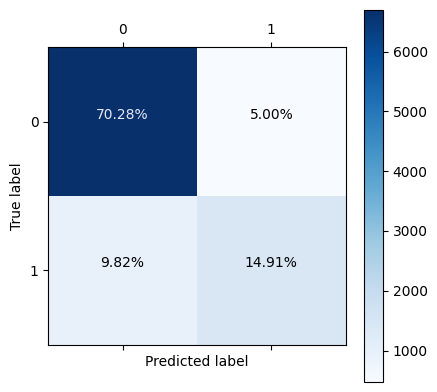

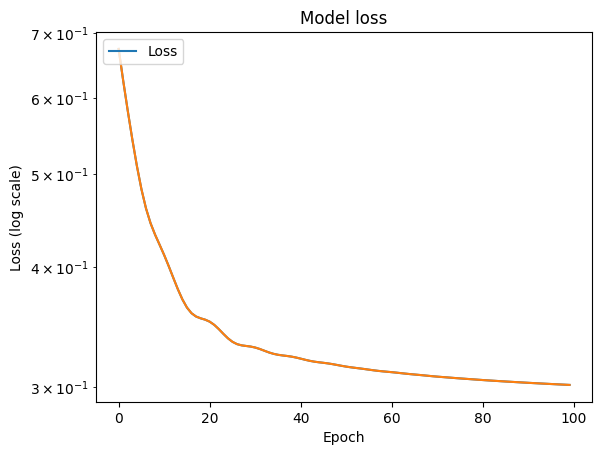

In [176]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred.detach().numpy())

# Menampilkan plot hasil training
visualize_training(history)

# Menyimpan model
torch.save(model.state_dict(), 'model_pytorch_income.pth')

# B. Deep Learning dengan TensorFlow

## 2. Import Library yang Dibutuhkan

In [177]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # untuk membuat model neural network
from tensorflow.keras.layers import Dense, Input, Flatten # untuk menambahkan layer pada model
from tensorflow.keras.optimizers import SGD # untuk mengoptimalkan model neural network
import matplotlib.pyplot as plt # untuk membuat plot

## 3. Penyusunan Model Neural Network


In [178]:
# Menentukan hyperparameter model
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 64 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

model_tf = Sequential([
    Input(shape=(input_dim,)),
    Dense(hidden_dim, activation='relu'),
    Dense(hidden_dim, activation='relu'),
    Dense(1, activation='relu')
])

## 4. Kompilasi Model

In [179]:
# Kompilasi model
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 5. Pelatihan Model

In [180]:
# Melatih model
history = model_tf.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8297 - loss: 0.4586 - val_accuracy: 0.8442 - val_loss: 0.3674
Epoch 2/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8508 - loss: 0.3769 - val_accuracy: 0.8502 - val_loss: 0.3709
Epoch 3/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8551 - loss: 0.3516 - val_accuracy: 0.8531 - val_loss: 0.3512
Epoch 4/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8553 - loss: 0.3597 - val_accuracy: 0.8499 - val_loss: 0.3634
Epoch 5/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8558 - loss: 0.3498 - val_accuracy: 0.8512 - val_loss: 0.3534
Epoch 6/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8578 - loss: 0.3502 - val_accuracy: 0.8519 - val_loss: 0.3706
Epoch 7/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8601 - loss: 0.3401 - val_accuracy: 0.8547 - val_loss: 0.3561
Epoch 8/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - loss: 0.3339 - 

## 6. Evaluasi model dengan menghitung MSE, RMSE, dan RSquared

In [181]:
# Memprediksi data uji
y_pred = (model_tf.predict(X_test) > 0.5).astype(int).flatten()

# Menghitung metrik evaluasi
y_pred = (y_pred > 0.2).astype(int)
accuracy, precision, recall, f1, auc_score, fpr, tpr = calculate_metrics(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'AUC: {auc_score}')
print(f'ROC: {fpr[1]}, {tpr[1]}')

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8523884514435696
Precision: 0.7597153804050356
Recall: 0.589384288747346
F1-score: 0.6637972262075562
AUC: 0.7640784763123062
ROC: 0.061227336122733615, 0.589384288747346


## 7. Memvisualisasikan Prediksi dari model yang telah dilatih

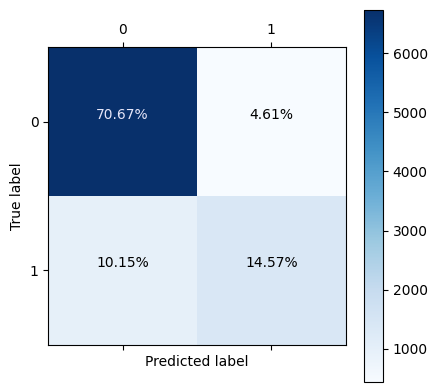

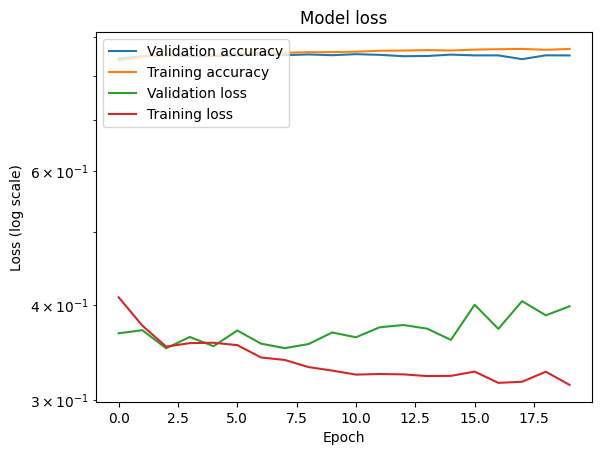

In [182]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred)

# Menampilkan plot hasil training
visualize_training(history.history)

# Menyimpan model
model_tf.save('model_tensorflow_income.keras')